In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

### Standard Bivariate Normal Distribution ###

As you have seen in exercises, the *correlation* between $X$ and $Y$ is defined as

$$
r(X, Y) ~ = ~ \frac{Cov(X, Y)}{SD(X)SD(Y)} ~ = ~ 
E\Big{(}  \frac{X-E(X)}{SD(X)}  \cdot \frac{Y-E(Y)}{SD(Y)}  \Big{)}
~ = ~ E(X^*Y^*)
$$

where $X^*$ is $X$ in standard units and $Y^*$ is $Y$ in standard units.

#### Properties of Correlation ####
You showed all of these in exercises.
- $r(X, Y)$ depends only on standard units and hence is a pure number with no units
- $r(X, Y) = r(Y, X)$
- $-1 \le r(X, Y) \le 1$ 
- If $Y = aX + b$ then $r(X, Y)$ is $1$ or $-1$ according as the sign of $a$ is positive or negative. 

We say that $r(X, Y)$ measures the *linear association* between $X$ and $Y$.

#### Variance of a Sum ####
Because $Cov(X, Y) = r(X, Y)SD(X)SD(Y)$, we have

$$
Var(X+Y) ~ = ~ Var(X) + Var(Y) + 2r(X, Y)SD(X)SD(Y)
$$

Notice the parallel with the formula for the length of the sum of two vectors, with correlation playing the role of the cosine of the angle between two vectors. If the angle is 90 degrees, the the cosine is 0; this corresponds to correlation being zero and hence the random variables being uncorrelated. Such parallels between orthogonal vectors and uncorrelated random variables are made precise in more advanced courses.


### Construction ###
Fix a number $\rho$ such that $-1 \le \rho \le 1$. That's the lower case Greek letter rho.

Let $X$ and $Z$ be i.i.d. standard normal variables, and define

$$
Y = \rho X + \sqrt{1 - \rho^2}Z
$$

If you think of $\rho$ as $\cos(\theta)$ for some angle $\theta$, then you can rewrite the definition as $Y = X\cos(\theta) + Y\sin(\theta)$. We will study the geometry more carefully later in this chapter.

Now $Y$ is normal because it is the sum of two independent normal variables. Moreover $Y$ is standard normal, because:

- $E(Y) = \rho E(X) + \sqrt{1 - \rho^2} E(Z) = 0$

- $Var(Y) = \rho^2 Var(X) + (1 - \rho^2)Var(Z) = \rho^2 + (1 - \rho^2) = 1$

To measure the association between $X$ and $Y$, we can calculate $r(X, Y)$. First note that since both $X$ and $Y$ are standard normal, we have $r(X, Y) = Cov(X, Y)$. So let's find the covariance of $X$ and $Y$. By bilinearity,

$$
Cov(X, Y) = \rho Cov(X, X) = \rho
$$

Thus **$\rho$ is the correlation between $X$ and $Y$**. Notice that this is another setting in which we can think of correlation as the cosine of an angle.

The random variables $X$ and $Y$ are said to have *the standard bivariate normal distribution with correlation $\rho$*. This is a joint distribution as it involves a pair of variables.

The function `plot_bivariate_norm` takes `rho` and `n` as its arguments and displays a scatter plot of `n` simulated $(X, Y)$ points.

In [2]:
def plot_bivariate_norm(rho, n):
    x = stats.norm.rvs(size=n)
    z = stats.norm.rvs(size=n)
    y = rho * x  +  (1 - rho**2)**0.5 * z
    plt.scatter(x, y)
    
    # Axes, labels, and titles
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.axes().set_aspect('equal')
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.title('Standard Bivariate Normal, Correlation '+str(rho))

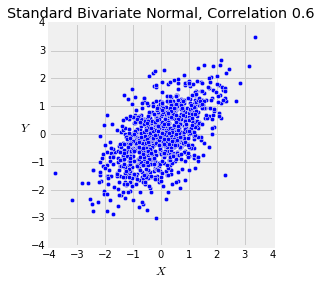

In [9]:
plot_bivariate_norm(0.6, 1000)

You can see the classic oval or "football shaped" scatter plot, familiar to you from Galton's data sets in Data 8. Run the cell a few times to see how the plot changes.

### Prediction ###
The relation 
$$
Y ~ = ~ \rho X + \sqrt{1 - \rho^2}Z
$$

where $X$ and $Z$ are standard normal allows us easily to find the best predictor of $Y$ based on $X$. As we showed in an earlier chapter, that's the conditional expectation $E(Y \mid X)$. Clearly,

$$
E(Y \mid X) ~ = ~ \rho X
$$

because $Z$ is independent of $X$ and $E(Z) = 0$. Thus $E(Y \mid X)$ is a linear function of $X$. We have shown:

**If $X$ and $Y$ have a standard bivariate normal distribution, then the best predictor of $Y$ based on $X$ is linear,** and has the equation of the regression line derived in the previous section.

The function `plot_bivariate_norm_regression` takes $\rho$ and $n$ as its arguments and displays the same plot as `plot_bivariate_norm` but with the regression line $E(Y \mid X) = \rho X$ (in green). You saw this plot in Data 8 but run the cell a few times anyway to refresh your memory. Notice the regression effect when $\rho > 0$: the green line is flatter than the red "equal standard units" 45 degree line. 

In [6]:
# HIDDEN 
def plot_bivariate_norm_regression(rho, n):
    x = stats.norm.rvs(size=n)
    z = stats.norm.rvs(size=n)
    y = rho * x  +  (1 - rho**2)**0.5 * z
    plt.scatter(x, y)
    if rho >= 0:
        plt.plot([-4, 4], [-4, 4], color='red', lw=2, label='y = x')
    else:
        plt.plot([-4, 4], [4, -4], color='red', lw=2, label='y = -x')
    
    plt.plot([-4, 4], [rho*(-4), rho*(4)], color='green', lw=2, label='Regression Line: y = '+str(rho)+'x')
    
    # Axes, labels, and titles
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.axes().set_aspect('equal')
    plt.legend(bbox_to_anchor=(2, 1.02))
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.title('Standard Bivariate Normal, Correlation '+str(rho))

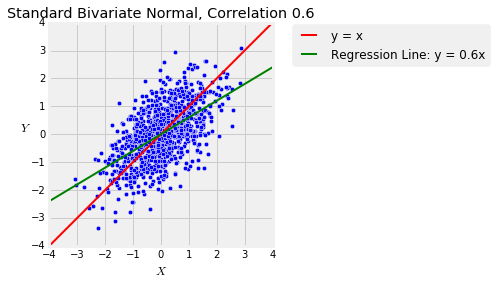

In [14]:
plot_bivariate_norm_regression(0.6, 1000)

### Prediction Error ###
The definition of $Y$ says that $Y$ is a linear function of $X$, plus some noise equal to $\sqrt{1 - \rho^2}Z$. The best predictor of $Y$ based on $X$ turns out to be the linear function $\rho X$. 

How far off can this prediction be? If we are given $X$, then $X$ becomes a constant and so

$$
Var(Y \mid X) ~ = ~ (1 - \rho^2)Var(Z) ~ = ~ 1 - \rho^2
$$

which doesn't depend on $X$. This makes sense because the "noise" term in the definition of $Y$ is $\sqrt{1 - \rho^2}Z$ which is independent of $X$.

### Distribution in a Vertical Strip ###
Given $X = x$, $Y$ becomes 
$$
Y ~ = ~ \rho x + \sqrt{1 - \rho^2} Z
$$

Hence the conditional distribution of $Y$ given $X = x$  is normal with mean $\rho x$ and SD $\sqrt{1 - \rho^2}$.

### Predicting Percentile Ranks ###
Suppose the scatter diagram of verbal and math test scores of a large population of students is roughly oval and that the correlation between the two variables is 0.5.

Given that a randomly picked student is on the 80th percentile of verbal scores, what is your prediction of the student's percentile rank on the math scores?

One way to answer such questions is by making some probabilistic assumptions. Reasonable assumptions, based on the information given, are that the student's standardized math score $M$ and standardized verbal score $V$ have the standard bivariate normal distribution with correlation $\rho = 0.5$.

Given that the student is on the 80th percentile of verbal scores, we know they are at what Python calls the 80 percent point of the standard normal curve. So their score in standard units is approximately 0.84:

In [18]:
standard_units_x = stats.norm.ppf(0.8)
standard_units_x

0.8416212335729143

The regression prediction of the math score in standard units is $0.5 \times 0.84 = 0.42$.

In [19]:
rho = 0.5
standard_units_predicted_y = rho * standard_units_x
standard_units_predicted_y

0.42081061678645715

The area to the left of 0.42 under the standard normal curve is about 66%, so your prediction is that the student will be on roughly the 66th percentile of math scores.

In [20]:
stats.norm.cdf(standard_units_predicted_y)

0.6630533107760167

Don't worry about details of accuracy and decimal points in such settings. There calculation is based on a probabilistic model about data; possible deviations from that model will have a much larger effect on the quality of the prediction than whether your answer is the 67th percentile instead of the 66th.

You should notice, however, that the regression effect is clearly visible in the answer. The student's predicted math score is closer to average than their verbal score.